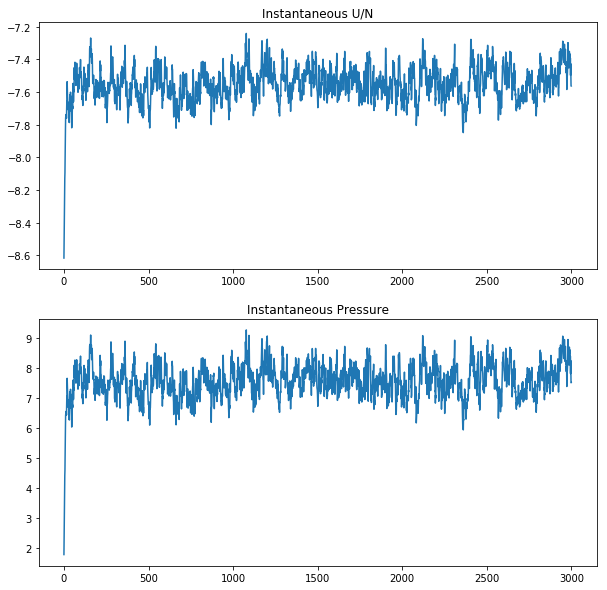

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("MonteCarlo_NVT/output.inst")

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
y_e = x[:,1]
y_p = x[:,2]
x = np.arange(len(y_e))

axs[0].plot(x,y_e)
axs[1].plot(x,y_p)

axs[0].set_title('Instantaneous U/N')
axs[1].set_title('Instantaneous Pressure')

plt.show()

Dopo aver equilibrato (delta 0.1 per solido, 0.2 per liquido e 3.0 per gassoso)

In [3]:
def AutoCorrelation(x, tau):
    lenght = len(x)-tau
    x_t=0
    x_tT=0
    x_xT=0
    x_2=0
    for t in range(lenght):
        x_t  += x[t]
        x_tT += x[t+tau]
        x_xT += x[t]*x[t+tau]
        x_2  += x[t]**2
    x_t  = x_t/lenght
    x_tT = x_tT/lenght
    x_xT = x_xT/lenght
    x_2  = x_2/lenght
    return (x_xT-x_t*x_tT)/(x_2-x_t**2)

# sto facendo tutte le analisi per il solido, aggiungere anche il resto alla fine

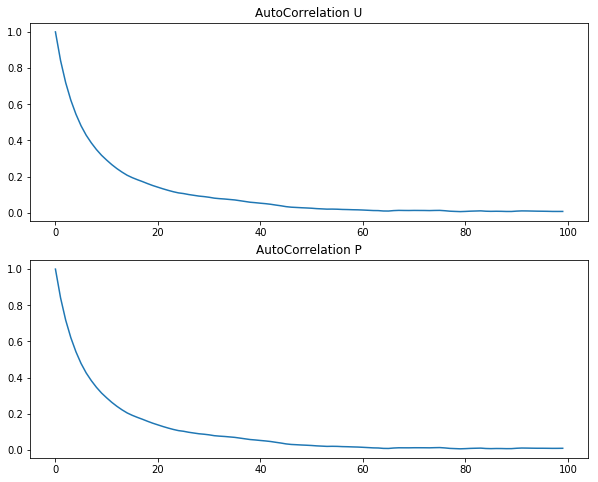

In [4]:
e = np.loadtxt("Solido/output.epot.0")
p = np.loadtxt("Solido/output.pres.0")

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=False, sharey=False,
                        tight_layout=False)
y_e = e[:,1]
y_p = p[:,1]

acU = []
acP = []
for tau in range(100):
        acU.append(AutoCorrelation(y_e,tau))
        acP.append(AutoCorrelation(y_p,tau))

x = np.arange(len(acU))
axs[0].plot(x,acU)
axs[1].plot(x,acP)

axs[0].set_title('AutoCorrelation U')
axs[1].set_title('AutoCorrelation P')

plt.show()

In [6]:
from scipy.optimize import curve_fit

def f(x,a):
    return np.exp(-a*x)

U exp-fit parameter: 
[0.11553935]
P exp-fit parameter: 
[0.11744169]


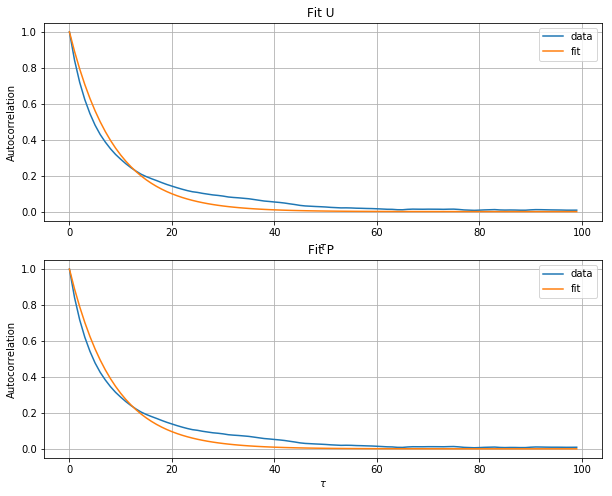

In [7]:
p_opt, p_cov = curve_fit(f, x, acU)
print("U exp-fit parameter: ")
print(p_opt)
fit = f(x,p_opt)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=False, sharey=False,
                        tight_layout=False)
  
axs[0].plot(x,acU, label="data") # plotting noisy data
axs[0].plot(x,fit, label="fit") # plotting fitted function

p_optp, p_covp = curve_fit(f, x, acP)
print("P exp-fit parameter: ")
print(p_optp)
fit = f(x,p_optp)

axs[1].plot(x,acP, label="data") # plotting noisy data
axs[1].plot(x,fit, label="fit") # plotting fitted function

axs[0].set_xlabel(r'$\tau$')
axs[0].set_ylabel('Autocorrelation')
axs[1].set_xlabel(r'$\tau$')
axs[1].set_ylabel('Autocorrelation')

axs[0].set_title('Fit U ')
axs[1].set_title('Fit P ')

axs[0].legend()
axs[0].grid(True)
axs[1].legend()
axs[1].grid(True)

plt.show()

In [8]:
L = np.array([10, 100, 500, 1000, 2000, 2500, 4000, 5000])
M = len(y_e)
N = M/L
print(N)

[10000.  1000.   200.   100.    50.    40.    25.    20.]


In [9]:
errors = np.zeros(len(L))
index=0
for l in L:
    n = int(M/l)
    avg = np.zeros(n)
    err = np.zeros(n)
    for i_blk in range(n):
        for i_stp in range(l):
            #print("l: " +str(l)+" | n: "+str(n)+" | index: "+str(i_blk*l+i_stp))
            avg[i_blk]+=y_e[(i_blk*l+i_stp)]
        avg[i_blk] = avg[i_blk]/n
    for i in range(n):
        accumulate = 0
        accumulate_2 = 0
        for j in range(i+1):
            accumulate = accumulate + avg[j]
            accumulate_2 = accumulate_2 + avg[j]**2
        glob_avg = accumulate/(i+1)
        glob_avg_2 = accumulate_2/(i+1)
        err = np.sqrt((glob_avg_2 - glob_avg**2)/(i+1))
    print("error #" +str(index+1)+" is: "+str(err))
        
    errors[index]=err
    index+=1 

error #1 is: 7.110160463027854e-07
error #2 is: 0.00011633542626826398
error #3 is: 0.003024305997282453
error #4 is: 0.012659382916916095
error #5 is: 0.04301266175985571
error #6 is: 0.06542569689737868
error #7 is: 0.142892405803621
error #8 is: 0.28375310899799966


[7.11016046e-07 1.16335426e-04 3.02430600e-03 1.26593829e-02
 4.30126618e-02 6.54256969e-02 1.42892406e-01 2.83753109e-01]


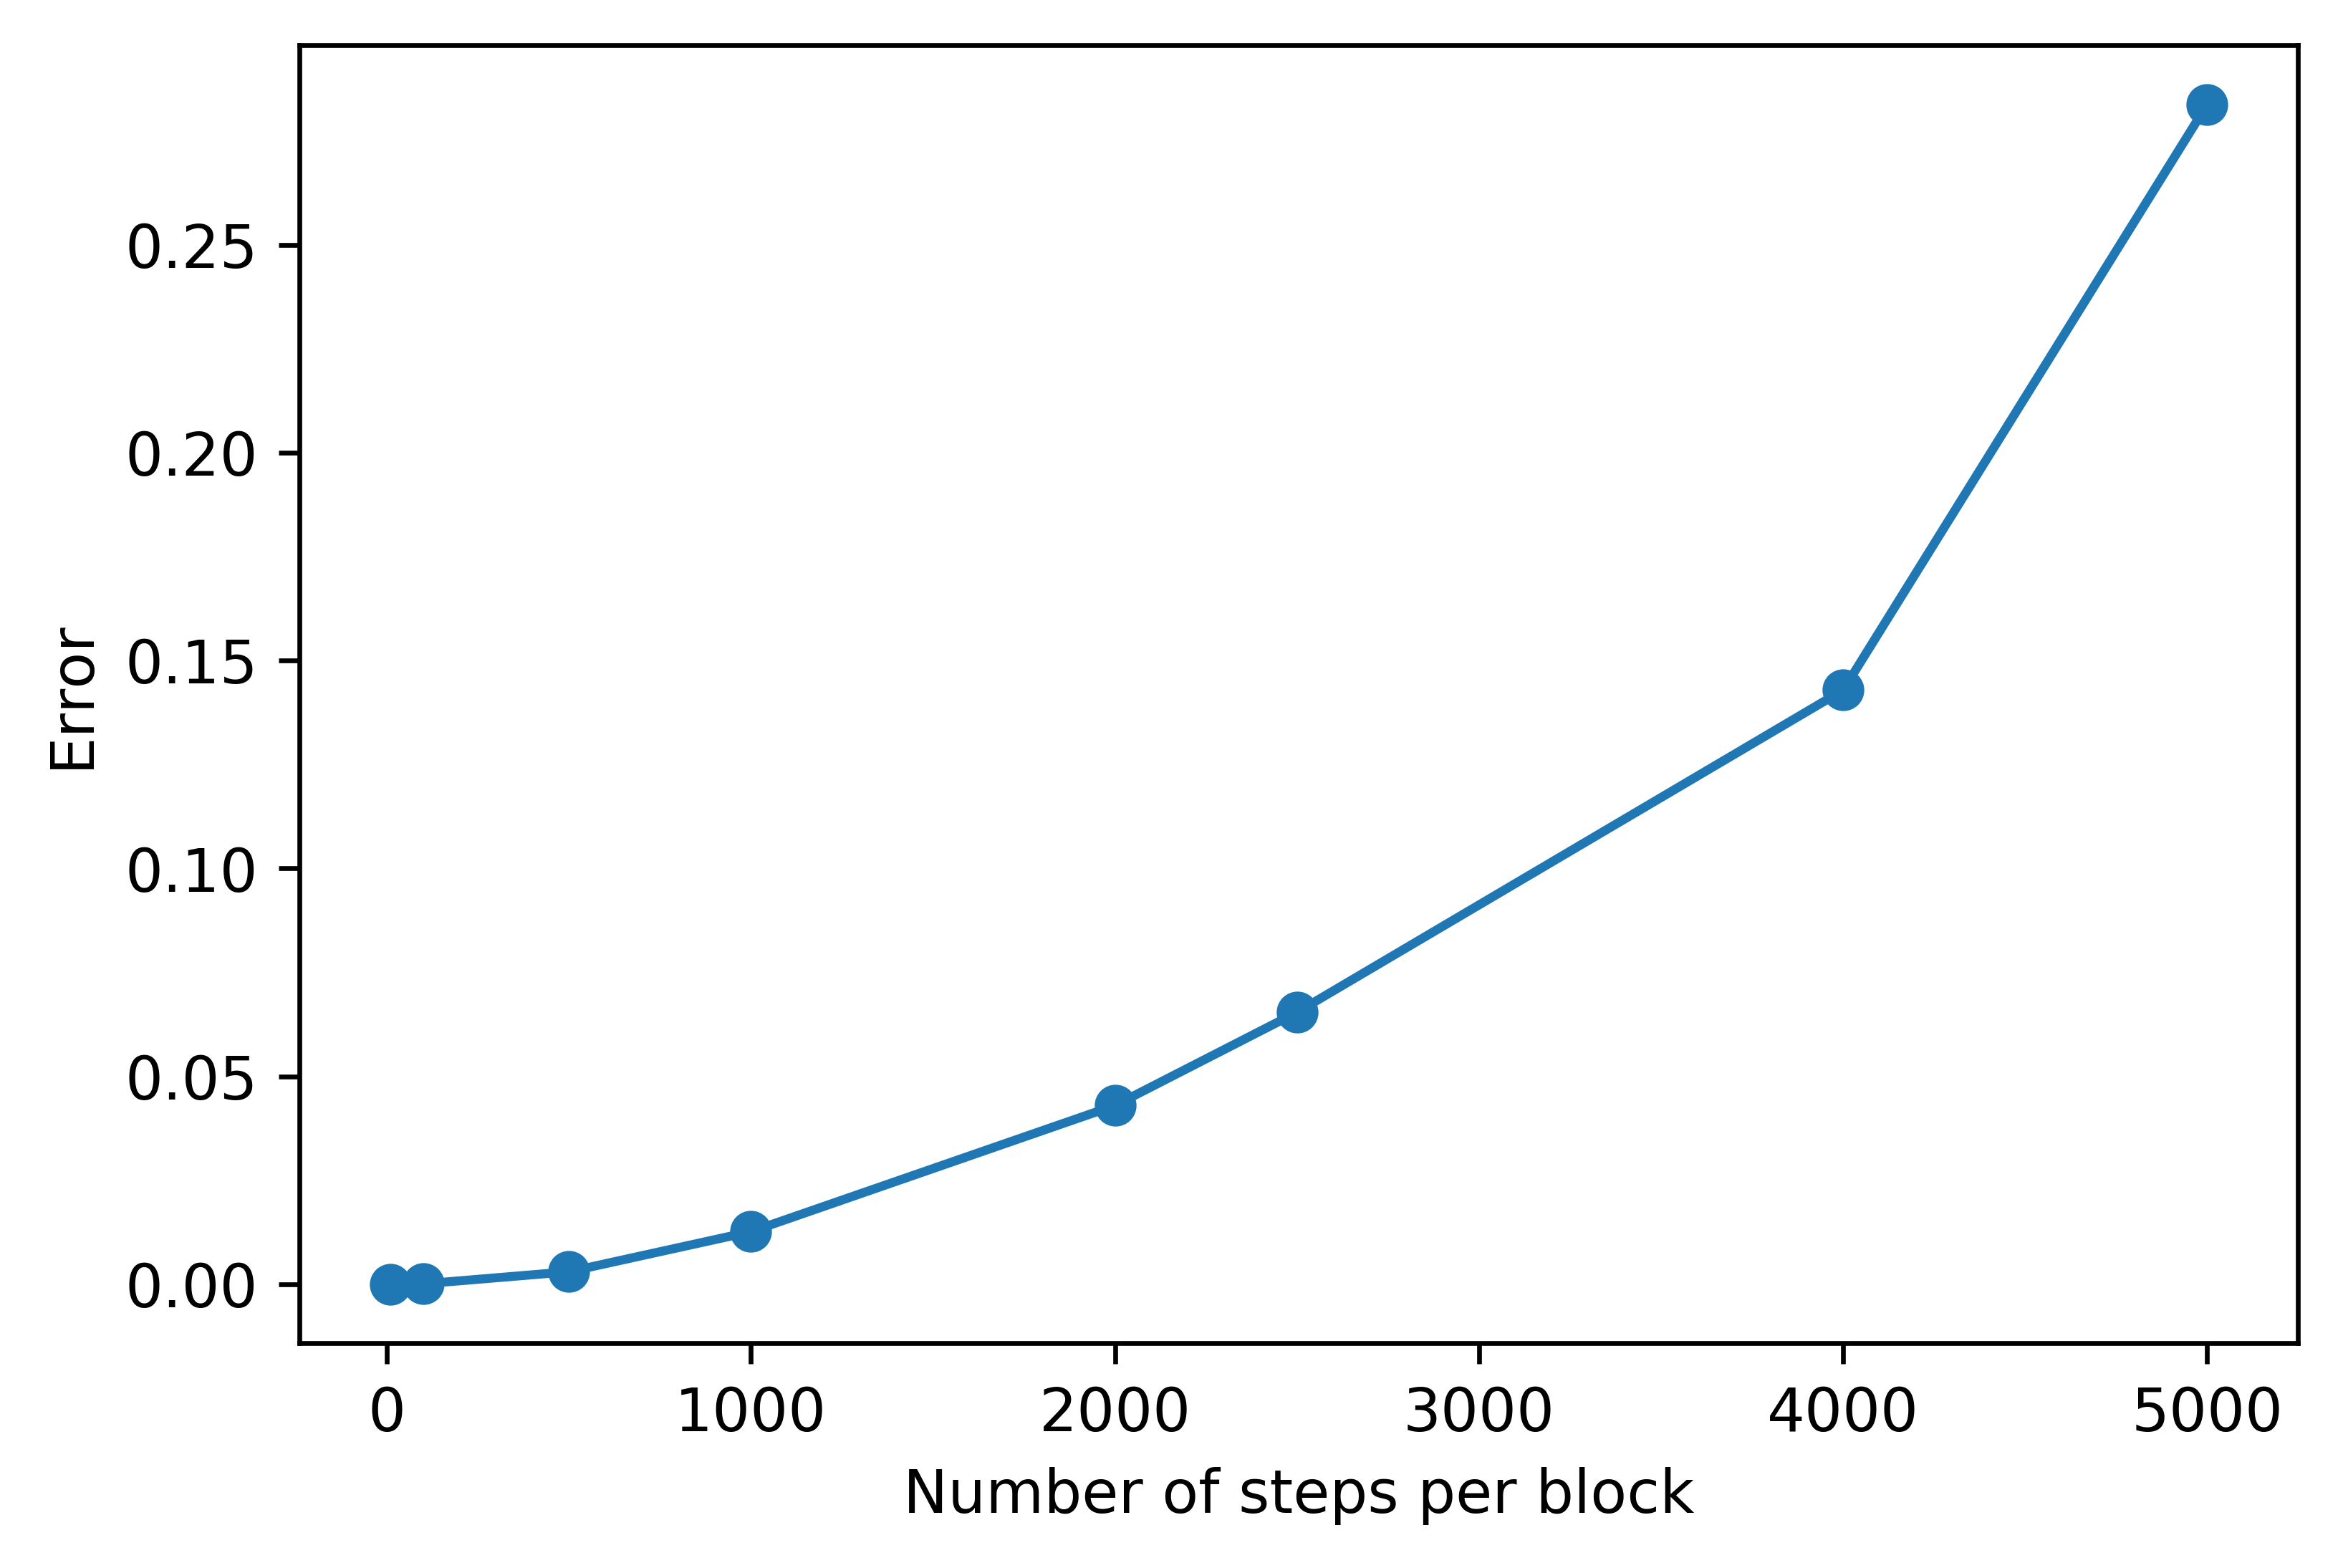

In [10]:
plt.figure(num=None, figsize=(6, 4), dpi=600, facecolor='w', edgecolor='k')

plt.plot(L,errors, linestyle='-', marker='o')
plt.xlabel("Number of steps per block")
plt.ylabel("Error")
print(errors)
plt.show()



## 7.2 & 7.3

In [44]:
d_sol = np.loadtxt("MonteCarlo_NVT/GAVE.solid")
d_liq = np.loadtxt("MonteCarlo_NVT/GAVE.liquid")
d_gas = np.loadtxt("MonteCarlo_NVT/GAVE.gas")

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)

half_edge_s=0.023
y_ave_s = d_sol[:,1]
y_error_s = d_sol[:,2]

half_edge_l=(5.13/2)/100
y_ave_l = d_liq[:,1]
y_error_l = d_liq[:,2]

half_edge_g=(12.92/2)/100
y_ave_g = d_gas[:,1]
y_error_g = d_gas[:,2]


l = len(y_ave_s)
x = np.arange(l)


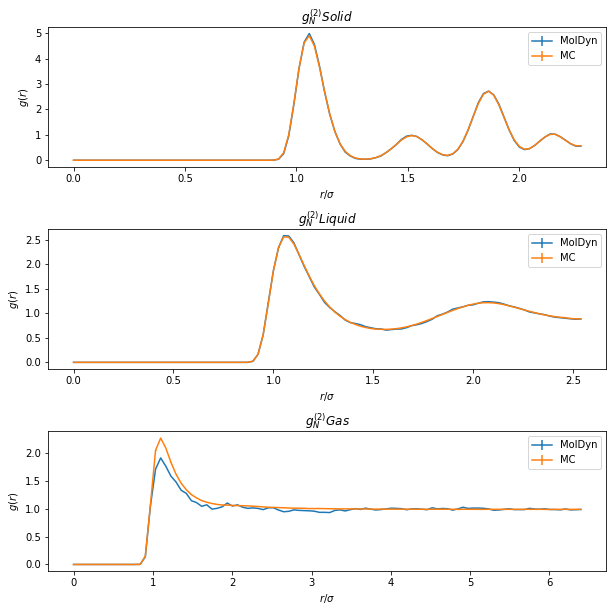

In [43]:
d_sol_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.solid")
d_liq_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.liquid")
d_gas_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.gas")

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)

half_edge_s=0.023
y_ave_s_mol = d_sol_mol[:,1]
y_error_s_mol = d_sol_mol[:,2]

half_edge_l_mol=(5.13/2)/100
y_ave_l_mol = d_liq_mol[:,1]
y_error_l_mol = d_liq_mol[:,2]

half_edge_g=(12.92/2)/100
y_ave_g_mol = d_gas_mol[:,1]
y_error_g_mol = d_gas_mol[:,2]


l = len(y_ave_s_mol)
x_mol = np.arange(l)

#print(y_error)

axs[0].errorbar(half_edge_s*x_mol,y_ave_s_mol/100,yerr=y_error_s_mol,label="MolDyn")
axs[1].errorbar(half_edge_l*x_mol,y_ave_l_mol/100,yerr=y_error_l_mol,label="MolDyn")
axs[2].errorbar(half_edge_g*x_mol,y_ave_g_mol/100,yerr=y_error_g_mol,label="MolDyn")
axs[0].errorbar(half_edge_s*x,y_ave_s,yerr=y_error_s,label="MC")
axs[1].errorbar(half_edge_l*x,y_ave_l,yerr=y_error_l,label="MC")
axs[2].errorbar(half_edge_g*x,y_ave_g,yerr=y_error_g,label="MC")

axs[0].set_xlabel(r'$r/\sigma$')
axs[1].set_xlabel(r'$r/\sigma$')
axs[2].set_xlabel(r'$r/\sigma$')

axs[0].set_ylabel(r'$g(r)$')
axs[1].set_ylabel(r'$g(r)$')
axs[2].set_ylabel(r'$g(r)$')

axs[0].set_title(r'$g^{(2)}_N Solid$')
axs[1].set_title(r'$g^{(2)}_N Liquid$')
axs[2].set_title(r'$g^{(2)}_N Gas$')

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.show()

## es7.4

Argon

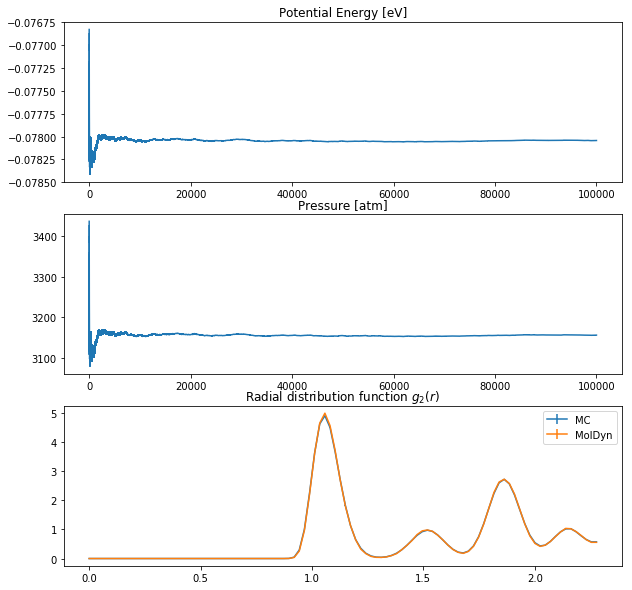

In [8]:
e = np.loadtxt("Solido/output.epot.0")
p = np.loadtxt("Solido/output.pres.0")
d_sol = np.loadtxt("MonteCarlo_NVT/GAVE.solid")
d_sol_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.solid")

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
x_e = e[:,0]
x_p = p[:,0]
y_e = e[:,2]
y_p = p[:,2]
y_e_error = e[:,3]
y_p_error = p[:,3]

half_edge_s=0.023
y_ave_s = d_sol[:,1]
y_error_s = d_sol[:,2]
half_edge_s=0.023
y_ave_s_mol = d_sol_mol[:,1]
y_error_s_mol = d_sol_mol[:,2]

l = len(y_ave_s)
x = np.arange(l)
l = len(y_ave_s_mol)
x_mol = np.arange(l)

T0=120
sigma = 0.34
kb = 8.61673324*0.00001

axs[0].errorbar(x_e,y_e*(T0*kb),yerr=y_e_error*(T0*kb))
axs[1].errorbar(x_p,y_p*(T0*1.38064852)/(sigma**3)*(10000/101325),yerr=y_p_error*(T0*1.38064852)/(sigma**3)*(10000/101325))
axs[2].errorbar(half_edge_s*x,y_ave_s,yerr=y_error_s,label="MC")
axs[2].errorbar(half_edge_s*x_mol,y_ave_s_mol/100,yerr=y_error_s_mol,label="MolDyn")

axs[0].set_title('Potential Energy [eV]')
axs[1].set_title('Pressure [atm]')
axs[2].set_title('Radial distribution function $g_2(r)$')

axs[2].legend()
plt.show()

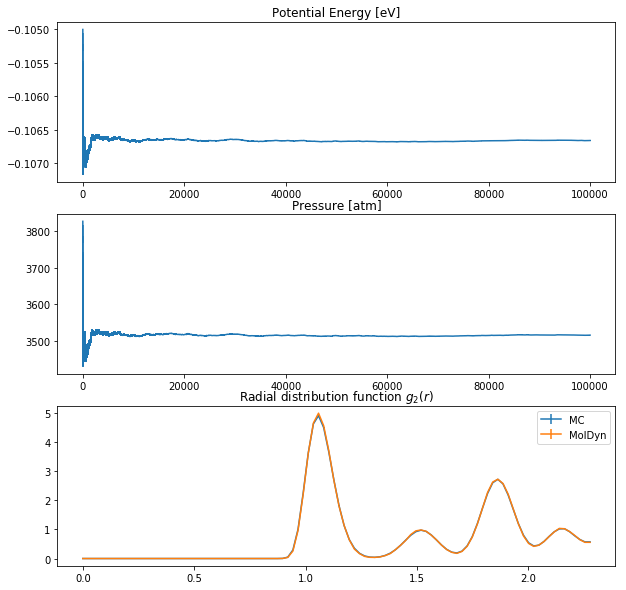

In [9]:
e = np.loadtxt("Solido/output.epot.0")
p = np.loadtxt("Solido/output.pres.0")
d_sol = np.loadtxt("MonteCarlo_NVT/GAVE.solid")
d_sol_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.solid")

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
x_e = e[:,0]
x_p = p[:,0]
y_e = e[:,2]
y_p = p[:,2]
y_e_error = e[:,3]
y_p_error = p[:,3]

half_edge_s=0.023
y_ave_s = d_sol[:,1]
y_error_s = d_sol[:,2]
half_edge_s=0.023
y_ave_s_mol = d_sol_mol[:,1]
y_error_s_mol = d_sol_mol[:,2]

l = len(y_ave_s)
x = np.arange(l)
l = len(y_ave_s_mol)
x_mol = np.arange(l)

T0=164
sigma = 0.364
kb = 8.61673324*0.00001

axs[0].errorbar(x_e,y_e*(T0*kb),yerr=y_e_error*(T0*kb))
axs[1].errorbar(x_p,y_p*(T0*1.38064852)/(sigma**3)*(10000/101325),yerr=y_p_error*(T0*1.38064852)/(sigma**3)*(10000/101325))
axs[2].errorbar(half_edge_s*x,y_ave_s,yerr=y_error_s,label="MC")
axs[2].errorbar(half_edge_s*x_mol,y_ave_s_mol/100,yerr=y_error_s_mol,label="MolDyn")

axs[0].set_title('Potential Energy [eV]')
axs[1].set_title('Pressure [atm]')
axs[2].set_title('Radial distribution function $g_2(r)$')

axs[2].legend()
plt.show()